Лабораторна Робота № 2
Лінійна регресія


In [604]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

In [605]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

На базі EDA проведено у 1 ЛР побудувати пайплайн препроцесингу даних [API: 1]:
(за потреби) очистити дані від рядків чи колонок, заповнити пропущені значення;
(за потреби) нормалізувати та/чи масштабувати чисельні змінні (включно з вихідною);
(за потреби) енкодувати категоріальні дані обраним методом (наприклад target-енкодування);


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [607]:
    Q1 = df['CO2 Emissions(g/km)'].quantile(0.25)
    Q3 = df['CO2 Emissions(g/km)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlaier = ((df['CO2 Emissions(g/km)']<lower_bound)|(df['CO2 Emissions(g/km)']>upper_bound)).sum()
    print(outlaier)
    df = df.loc[(df['CO2 Emissions(g/km)'] >= lower_bound) & (df['CO2 Emissions(g/km)'] <= upper_bound)]
    
    outlaier = ((df['CO2 Emissions(g/km)']<lower_bound)|(df['CO2 Emissions(g/km)']>upper_bound)).sum()
    print(outlaier)


80
0


In [608]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

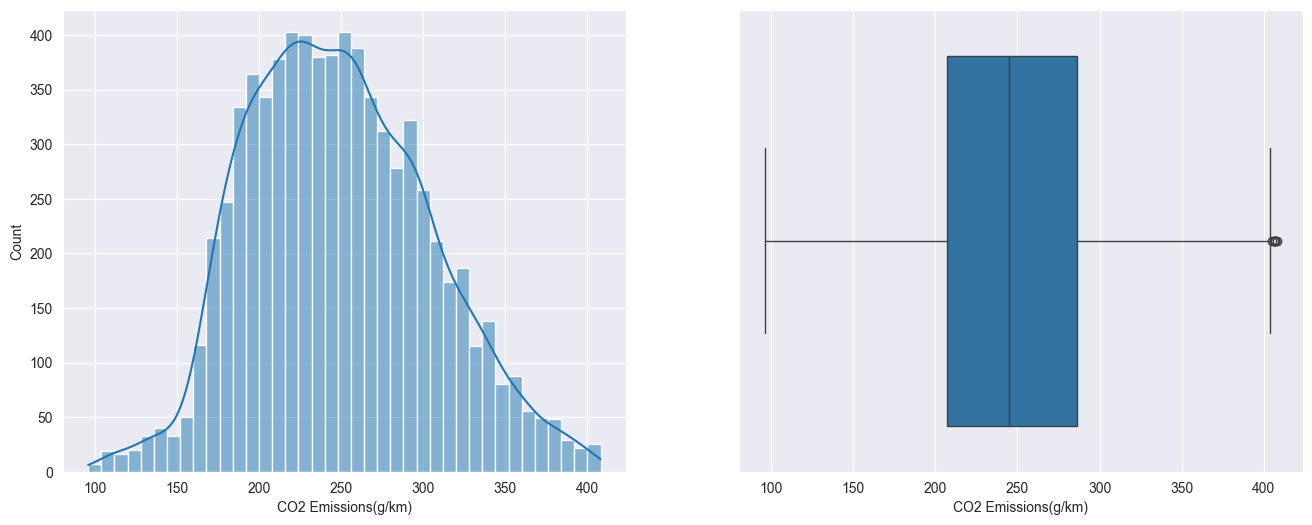

In [609]:
f , axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='CO2 Emissions(g/km)',kde=True, ax = axs[0])
sns.boxplot(data=df, x='CO2 Emissions(g/km)', ax= axs[1])
plt.show()

In [610]:
df = df.dropna(subset=['Fuel Type'])
df = df[df['Fuel Type'] != 'N']

In [611]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7304 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7304 non-null   object 
 1   Model                             7304 non-null   object 
 2   Vehicle Class                     7304 non-null   object 
 3   Engine Size(L)                    7304 non-null   float64
 4   Cylinders                         7304 non-null   int64  
 5   Transmission                      7304 non-null   object 
 6   Fuel Type                         7304 non-null   object 
 7   Fuel Consumption City (L/100 km)  7304 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7304 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7304 non-null   float64
 10  Fuel Consumption Comb (mpg)       7304 non-null   int64  
 11  CO2 Emissions(g/km)               7304 non-null   int64  
dtypes: float64(

In [613]:
df_copy = df.copy()
columns_to_encode = ['Make', 'Vehicle Class', 'Cylinders', 'Transmission', 'Fuel Type']

for column in columns_to_encode:
    binary_encoded = pd.get_dummies(df[column], prefix=column)
    df_copy = pd.concat([df_copy, binary_encoded], axis=1)
    df_copy.drop(column, axis=1, inplace=True)
    

In [614]:
df_copy.drop(columns=['CO2 Emissions(g/km)', 'Model'], inplace=True)


In [615]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7304 entries, 0 to 7384
Data columns (total 100 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Engine Size(L)                          7304 non-null   float64
 1   Fuel Consumption City (L/100 km)        7304 non-null   float64
 2   Fuel Consumption Hwy (L/100 km)         7304 non-null   float64
 3   Fuel Consumption Comb (L/100 km)        7304 non-null   float64
 4   Fuel Consumption Comb (mpg)             7304 non-null   int64  
 5   Make_ACURA                              7304 non-null   bool   
 6   Make_ALFA ROMEO                         7304 non-null   bool   
 7   Make_ASTON MARTIN                       7304 non-null   bool   
 8   Make_AUDI                               7304 non-null   bool   
 9   Make_BENTLEY                            7304 non-null   bool   
 10  Make_BMW                                7304 non-null   bool   


Розділити дані на тренувальну та тестову вибірки, “навчити” препроцесинг на тренувальній вибірці, перетворити тренувальну та тестову вибірки (див. Рекомендації щодо програмного рішення для ЛР 2, пункт 2.1.).

In [616]:
feature = df_copy
labels = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.2, random_state = 0)

In [617]:
print("Розмір X_train:", X_train.shape)
print("Розмір y_train:", y_train.shape)
print("Розмір X_test:", X_test.shape)
print("Розмір y_test:", y_test.shape)

Розмір X_train: (5843, 100)
Розмір y_train: (5843,)
Розмір X_test: (1461, 100)
Розмір y_test: (1461,)


In [618]:
for els in [y_train, y_test]:
    print(round(len(els)/len(labels), 2))

0.8
0.2


In [619]:
numeric_features = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                    'Fuel Consumption Comb (mpg)']
categorical_features = [col for col in feature.columns if col not in numeric_features]

In [620]:
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

In [621]:
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)

In [622]:
X_train_scaled = np.concatenate((X_train_numeric_scaled, X_train_categorical.values), axis=1)
X_test_scaled = np.concatenate((X_test_numeric_scaled, X_test_categorical.values), axis=1)


Лінійна регресія

In [623]:
print("Розмір X_train_scaled:", X_train_scaled.shape)
print("Розмір y_train:", y_train.shape)
print("Розмір X_test_scaled:", X_test_scaled.shape)
print("Розмір y_test:", y_test.shape)

Розмір X_train_scaled: (5843, 100)
Розмір y_train: (5843,)
Розмір X_test_scaled: (1461, 100)
Розмір y_test: (1461,)


In [624]:
LinReg = LinearRegression()

LinReg.fit(X_train_scaled, y_train)
predictions = LinReg.predict(X_test_scaled)
r2 = LinReg.score(X_test_scaled, y_test)
print("score:", r2)

score: 0.9930676807415387


In [625]:
def print_metrics(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R²:", r_squared)


In [626]:
lineal = print_metrics(y_test, predictions)

Mean Absolute Error (MAE): 2.799725145448323
Mean Squared Error (MSE): 20.64309828677951
R²: 0.9930676807415387


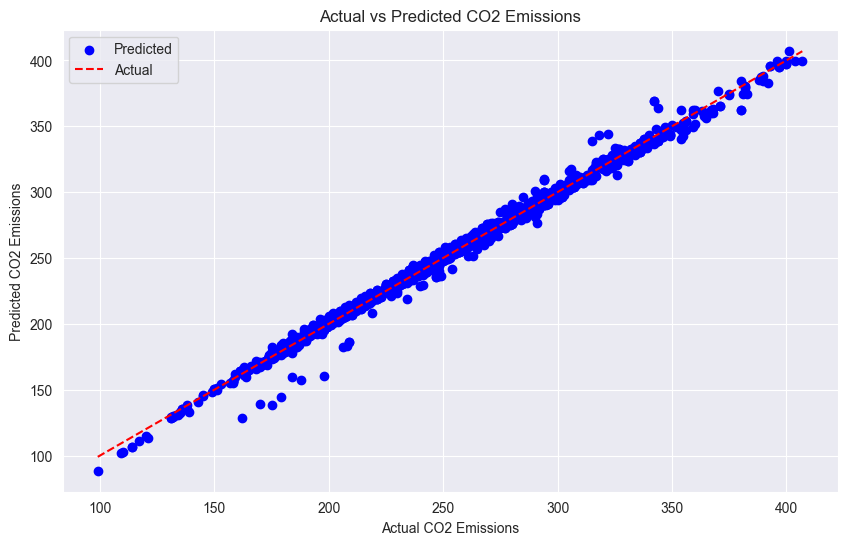

In [627]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Actual')
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.show()

In [628]:
coefficients = LinReg.coef_
feature_names = feature.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)


coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)
print("sorted_coefficients")
print(sorted_coefficients)

                             Feature   Coefficient
0                     Engine Size(L)  4.086899e-01
1   Fuel Consumption City (L/100 km)  2.055775e+01
2    Fuel Consumption Hwy (L/100 km)  1.183118e+01
3   Fuel Consumption Comb (L/100 km)  2.348155e+01
4        Fuel Consumption Comb (mpg) -5.957957e+00
..                               ...           ...
95                   Transmission_M7  7.223082e+10
96                       Fuel Type_D  2.929646e+12
97                       Fuel Type_E  2.929646e+12
98                       Fuel Type_X  2.929646e+12
99                       Fuel Type_Z  2.929646e+12

[100 rows x 2 columns]
sorted_coefficients
                             Feature   Coefficient  Absolute Coefficient
68                      Cylinders_12  5.729715e+12          5.729715e+12
67                      Cylinders_10  5.729715e+12          5.729715e+12
66                       Cylinders_8  5.729715e+12          5.729715e+12
62                       Cylinders_3  5.729715e+12  

Обчислити лишки на тестовій вибірці, провести аналіз лишків (нормальність розподілу, незалежність від вихідної змінної) 

In [629]:
residuals = y_test - predictions


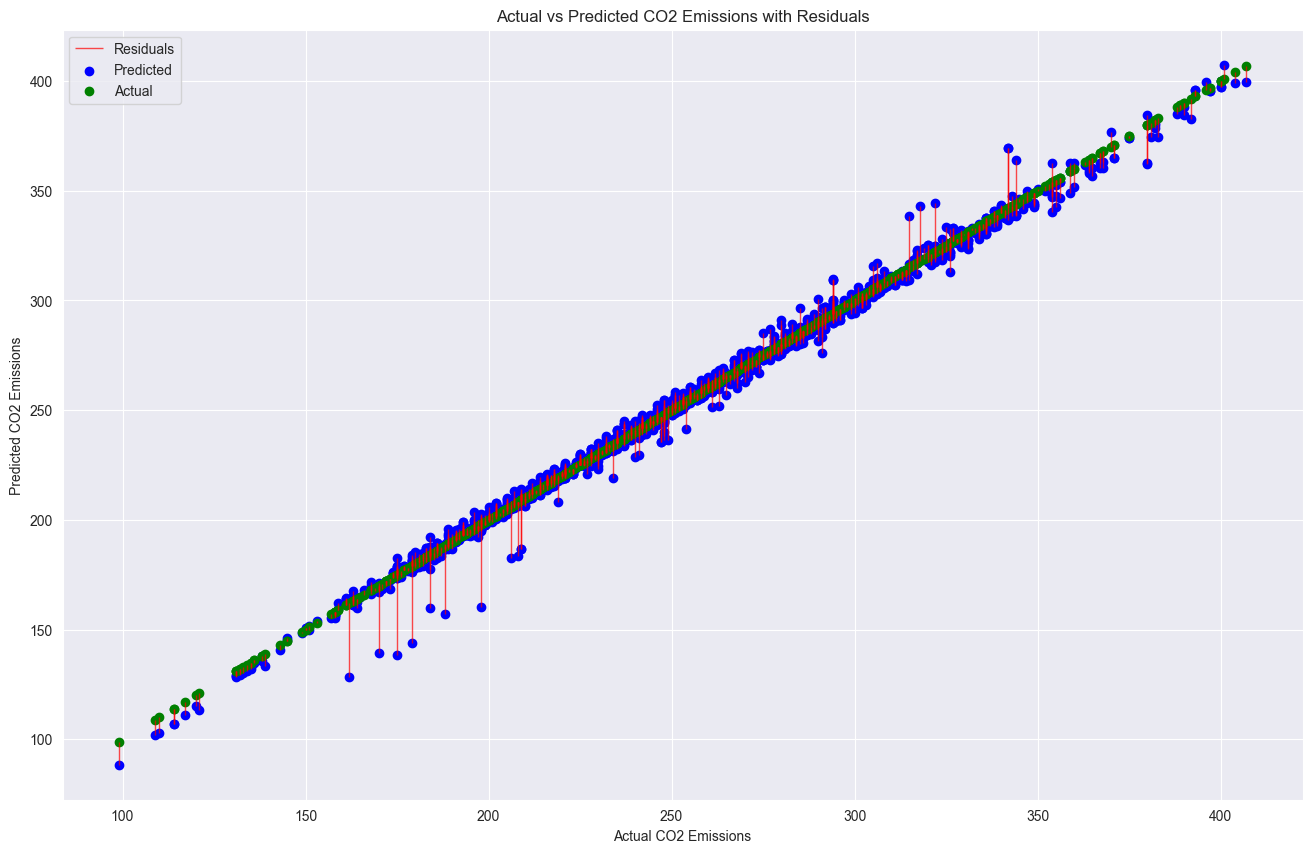

In [630]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.vlines(y_test, predictions, predictions + residuals, colors='red', alpha=0.7, linewidth=1, label='Residuals')
ax.scatter(y_test, predictions, color='blue', label='Predicted')
ax.scatter(y_test, y_test, color='green', label='Actual')

ax.set_xlabel('Actual CO2 Emissions')
ax.set_ylabel('Predicted CO2 Emissions')
ax.set_title('Actual vs Predicted CO2 Emissions with Residuals')
ax.legend()
plt.grid(True)
plt.show()


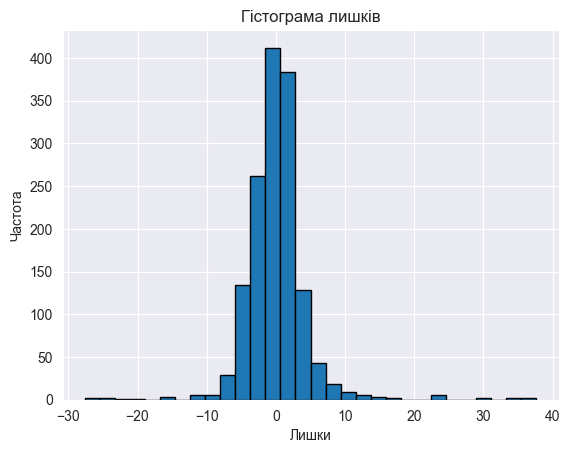

In [631]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Гістограма лишків')
plt.xlabel('Лишки')
plt.ylabel('Частота')
plt.show()

In [632]:
stat, p_value = normaltest(residuals)
print(f"Статистика тесту: {stat}, p-value: {p_value}")

# Якщо p-value менше вибраного рівня значимості (наприклад, 0.05), то відхиляємо нульову гіпотезу про нормальність розподілу
if p_value < 0.05:
    print("Розподіл лишків не є нормальним")
else:
    print("Розподіл лишків є нормальним")

Статистика тесту: 710.9616956692023, p-value: 4.136465087375165e-155
Розподіл лишків не є нормальним


Навчити модель на 3 відібраних вхідних змінних (на базі коефіцієнта кореляції, MI чи оцінці розподілі за категоріями проведеними в EDA), обчислити метрики на тестовій вибірці;

In [633]:
print(df.columns)


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [634]:
X_train_selected = X_train[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
X_test_selected = X_test[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]



In [635]:
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

LinearRegression()

In [636]:
predictions_selected = model_selected.predict(X_test_selected)

print_metrics(y_test, predictions_selected)

Mean Absolute Error (MAE): 12.98487848989438
Mean Squared Error (MSE): 390.8034162590398
R²: 0.8687612677531052


(для СА-33) Навчити модель на топ-3 відібраних вхідних змінних визначених з допомогою SelectKBest, обчислити метрики на тестовій вибірці;

In [637]:
selector = SelectKBest(score_func=f_regression, k=3)
X_train3 = selector.fit_transform(X_train_scaled, y_train)
X_test3 = selector.transform(X_test_scaled)
model3 = LinearRegression()
model3.fit(X_train3, y_train)

predictions3 = model3.predict(X_test3)
top3 = print_metrics(y_test, predictions3)

Mean Absolute Error (MAE): 12.577699398181203
Mean Squared Error (MSE): 409.0283840150436
R²: 0.8626409997000924


Побудувати модель L1-регуляризованої лінійної регресії Lasso

Навчити модель Lasso-регресії (на всіх змінних);

In [638]:
lasso_model = linear_model.Lasso(alpha=1.0, max_iter=10000) 
lasso_model.fit(X_train_scaled, y_train)
r2_l = lasso_model.score(X_test_scaled, y_test)
print("coef:", r2_l)


coef: 0.9708458671850017


In [639]:
lasso_model = linear_model.Lasso(max_iter=10000) 
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [640]:
best_alpha = grid_search.best_params_['alpha']
lasso_tuned = linear_model.Lasso(alpha=best_alpha)
lasso_tuned.fit(X_train_scaled, y_train)
r2_t = lasso_tuned.score(X_test_scaled, y_test)
print("Best Alpha:", best_alpha)
print("coef:", r2_t)


Best Alpha: 0.1
coef: 0.9921575756074082


In [641]:
predictions_lasso = lasso_tuned.predict(X_test_scaled)

lasso = print_metrics(y_test,predictions_lasso)

Mean Absolute Error (MAE): 3.120425310233068
Mean Squared Error (MSE): 23.353214343859097
R²: 0.9921575756074082


In [642]:
coefficients_lasso = lasso_tuned.coef_ 
print(coefficients_lasso)

feature_names = X_train.columns.tolist()
coefficients_lasso = lasso_tuned.coef_
coefficients_lasso_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (Lasso)': coefficients_lasso})
print(coefficients_lasso_df)


coefficients_lasso_df['Absolute Coefficient'] = np.abs(coefficients_lasso_df['Coefficient (Lasso)'])
sorted_coefficients_lasso = coefficients_lasso_df.sort_values(by='Absolute Coefficient', ascending=False)
print("sorted_coefficients_lasso")
print(sorted_coefficients_lasso)

[ 2.33920078e+00  3.48040338e+01  1.80695815e+01  2.02837330e+00
 -6.28911442e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.54450283e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

Навчити модель L2-регуляризованої лінійної регресії Ridge [API: 4]
Навчити модель Ridge-регресії (на всіх змінних) з тюнингом гіперпаратмерів, аналогічному до виконаного у Lasso-регресії;


In [643]:
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
random_search_ridge = RandomizedSearchCV(ridge_model, param_distributions=param_grid, n_iter=4, cv=5)
random_search_ridge.fit(X_train_scaled, y_train)
ridge_tuned = random_search_ridge.best_estimator_
print("Best alpha:", ridge_tuned.alpha)
print("Coefficients:", ridge_tuned.coef_)

Best alpha: 0.1
Coefficients: [ 4.24446239e-01  2.08007252e+01  1.19660453e+01  2.30507974e+01
 -5.98123183e+00 -2.73902927e+00 -4.14687357e-01  9.20110540e-01
 -1.68020471e+00  2.41624334e+00 -1.32279408e+00  1.26503409e-01
 -7.60914638e-01  9.85141259e-01  4.17999396e+00  2.90755113e+00
  3.80684344e-01  1.66472991e+00  2.76001321e+00  7.49811778e-01
 -3.34240724e-02  1.38543752e+00 -8.72650348e-01 -1.10645723e+00
  1.29463226e+00  1.08582941e+00 -1.21407432e-01 -2.46395341e+00
 -1.22780682e+00  1.76988004e+00  2.79696558e+00 -4.27151520e-01
 -1.09326097e+00 -1.47259691e+00 -1.15585821e+00  3.45763874e-01
 -1.28896943e+00  1.96417744e+00  1.60267296e+00 -1.22374936e+00
 -7.05285704e+00 -4.26719664e-01 -2.89763993e-01  6.76220959e-01
 -1.23489497e+00 -1.60321149e+00  6.23054128e-01  1.09656638e+00
  4.71711639e-01 -3.23712524e-01  5.29400463e-01  3.58942281e+00
  1.70066494e+00  9.76015119e-01  8.99159662e-01  6.16106342e-01
  2.39463578e-01  6.89767244e-01  2.11696030e+00  7.71875400

In [644]:
predictions_ridge = ridge_tuned.predict(X_test_scaled)

ridge = print_metrics(y_test, predictions_ridge)

Mean Absolute Error (MAE): 2.8004922402044863
Mean Squared Error (MSE): 20.620049494989747
R²: 0.9930754209354277


Обчислити лишки на тестовій вибірці, провести аналіз лишків (нормальність розподілу, незалежність від вихідної змінної) [API: 6];

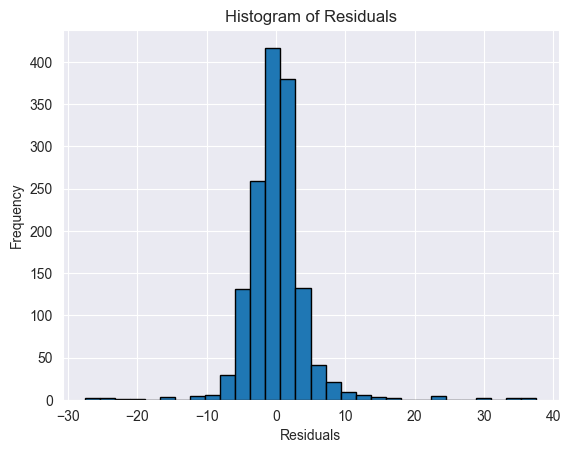

In [645]:
residuals = y_test - predictions_ridge
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


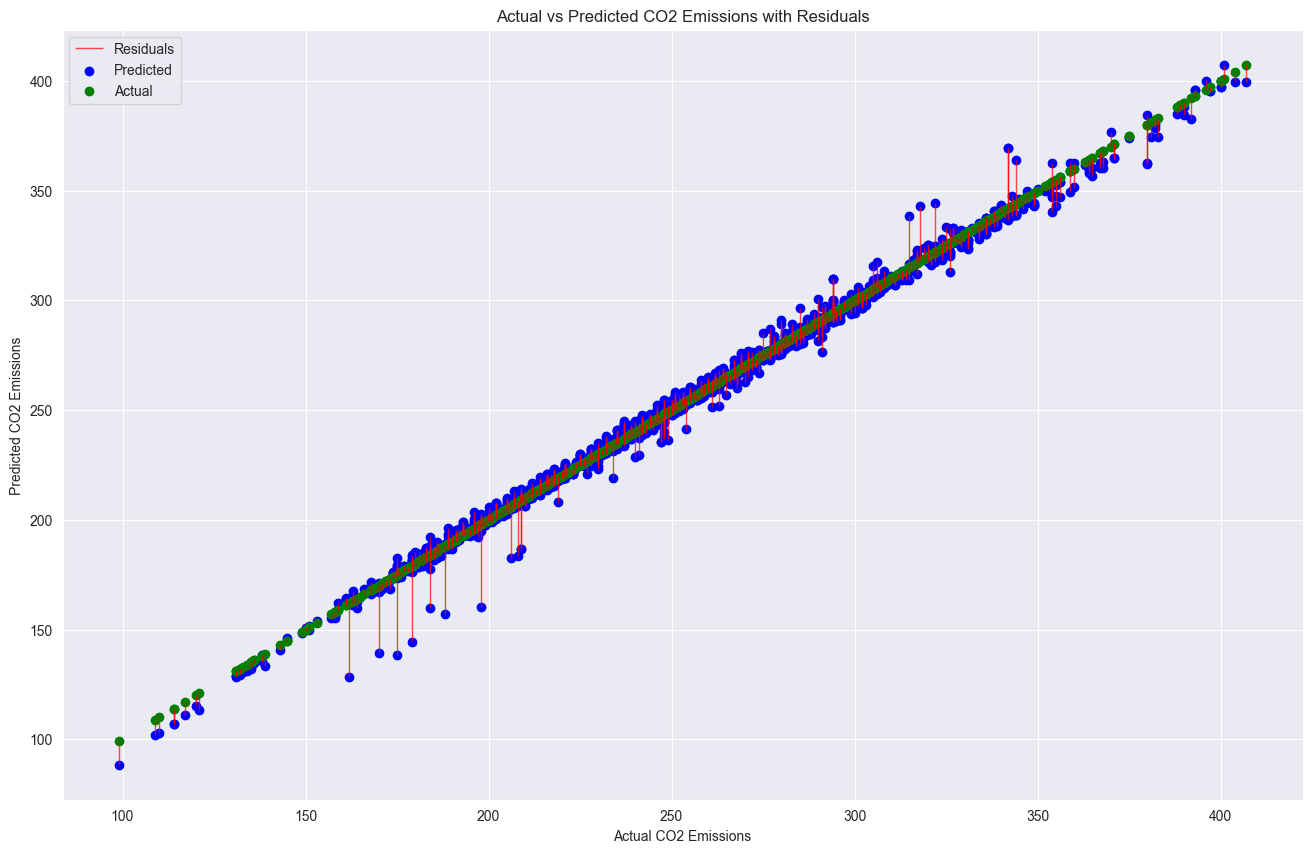

In [646]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.vlines(y_test, predictions_ridge, predictions_ridge + residuals, colors='red', alpha=0.7, linewidth=1, label='Residuals')
ax.scatter(y_test, predictions_ridge, color='blue', label='Predicted')
ax.scatter(y_test, y_test, color='green', label='Actual')

ax.set_xlabel('Actual CO2 Emissions')
ax.set_ylabel('Predicted CO2 Emissions')
ax.set_title('Actual vs Predicted CO2 Emissions with Residuals')
ax.legend()
plt.grid(True)
plt.show()


Вивести порівняльну таблицю для чотирьох моделей по всім заданим метрикам, зробити відповідні висновки.

In [647]:
def calculate_metrics(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'R²': r_squared}

metrics_lineal = calculate_metrics(y_test, predictions)
metrics_top3 = calculate_metrics(y_test, predictions3)
metrics_lasso = calculate_metrics(y_test, predictions_lasso)
metrics_ridge = calculate_metrics(y_test, predictions_ridge)

metrics_data = {
    'Model': ['Lineal', 'Top3', 'Lasso', 'Ridge'],
    'MAE': [metrics_lineal['MAE'], metrics_top3['MAE'], metrics_lasso['MAE'], metrics_ridge['MAE']],
    'MSE': [metrics_lineal['MSE'], metrics_top3['MSE'], metrics_lasso['MSE'], metrics_ridge['MSE']],
    'R²': [metrics_lineal['R²'], metrics_top3['R²'], metrics_lasso['R²'], metrics_ridge['R²']]
}

metrics_df = pd.DataFrame(metrics_data)


print(metrics_df)

    Model        MAE         MSE        R²
0  Lineal   2.799725   20.643098  0.993068
1    Top3  12.577699  409.028384  0.862641
2   Lasso   3.120425   23.353214  0.992158
3   Ridge   2.800492   20.620049  0.993075


Точне і узгоджене все, але Лінійна регресія більше (крім 4)